# Hackathon: Cheat sheet

Scenario:

<img src="images/justice.png">

You are a group of interns working for "Justice for All," a non-profit organization in Los Angeles. Ellen, the director, has called upon you, the resident spatial data scientists, to produce a report based on a .geojson file that your manager Kazu has compiled. Kazu downloaded the data from Social Explorer, cleaned it up, and merged it with a geojson file. Kazu's wife went into labor last night (they are expecting a baby girl!) so it is now up to you to continue where Kazu left off. Ellen has a board meeting in an hour and wants you to produce a report for her in a Google Doc with the following material:

Part 1:
- A series of preliminary stats/charts of the data
- Maps: 
  - Make sure to zoom in to Los Angeles (crop Catalina Island out)
  - A series of choropleth maps
  - A series of side-by-side choropleth maps that show meaningful differences (make sure to make the legends, i.e. bin breaks the same on both maps)
  - Produce several maps that show two data layers: One basemap choropleth, and another overlay that shows the top values of another variable with red boundaries
  
Part 2:
- Import Council District boundaries from the LA Data Portal
- Create a demographic profile for each Council District
   - hint: Do a spatial join to get census tracts that intersect with each council district
   - show only the census tracts for each council district
   - use a loop and/or function to minimize your code


## Import the geojson file (code cell provided)

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf = gpd.read_file('data/acs2015_2019.geojson')

## Conduct a thorough exploration of the data, and answer the following questions:
   - what fields are included?
   - how many records and columns are there?
   - what does the data look like?
   - are the data types correct?

In [3]:
list(gdf)

['FIPS',
 'Total Population',
 'Population Density (Per Sq. Mile)',
 '% Total Population: Male',
 '% Total Population: Female',
 '% Total Population: Under 5 Years',
 '% Total Population: 5 to 9 Years',
 '% Total Population: 10 to 14 Years',
 '% Total Population: 15 to 17 Years',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Total Population: 45 to 54 Years',
 '% Total Population: 55 to 64 Years',
 '% Total Population: 65 to 74 Years',
 '% Total Population: 75 to 84 Years',
 '% Total Population: 85 Years and Over',
 '% Total Population: White Alone',
 '% Total Population: Black or African American Alone',
 '% Total Population: American Indian and Alaska Native Alone',
 '% Total Population: Asian Alone',
 '% Total Population: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Some Other Race Alone',
 '% Total Population: Two or More Races',
 '% Total Population: Not Hispanic or Latino',
 '% 

In [4]:
gdf.shape

(2346, 97)

In [5]:
gdf.head()

,FIPS,Total Population,Population Density (Per Sq. Mile),% Total Population: Male,% Total Population: Female,% Total Population: Under 5 Years,% Total Population: 5 to 9 Years,% Total Population: 10 to 14 Years,% Total Population: 15 to 17 Years,% Total Population: 18 to 24 Years,...,% Workers 16 Years and Over: Did Not Work At Home: Less than 10 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 10 to 19 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 20 to 29 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 30 to 39 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 40 to 59 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 60 to 89 Minutes,% Workers 16 Years and Over: Did Not Work At Home: 90 or More Minutes,% Workers 16 Years and Over: Worked At Home.1,Average Commute to Work (In Min),geometry
0,06037101110,4283,9710.180,47.63,52.37,6.61,6.05,4.67,3.08,6.79,...,4.24,9.72,29.21,21.90,17.12,11.20,2.57,4.05,33.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,3405,3335.385,47.75,52.25,2.29,3.08,6.87,0.35,8.49,...,0.49,3.05,15.87,24.15,34.79,11.56,5.89,4.20,42.0,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,6347,25263.420,52.78,47.22,6.65,7.52,6.03,3.12,10.26,...,9.16,19.20,19.33,24.17,13.61,8.73,1.57,4.22,29.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,3702,13719.170,46.38,53.62,3.73,4.38,8.35,3.84,8.24,...,3.64,23.35,17.20,23.60,18.96,8.47,0.50,4.27,29.0,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,3884,3897.202,48.84,51.16,2.29,5.51,2.39,1.11,4.69,...,3.20,14.14,21.49,18.52,17.56,10.44,2.41,12.23,34.0,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 97 columns):
 #   Column                                                                                        Non-Null Count  Dtype   
---  ------                                                                                        --------------  -----   
 0   FIPS                                                                                          2346 non-null   object  
 1   Total Population                                                                              2346 non-null   int64   
 2   Population Density (Per Sq. Mile)                                                             2343 non-null   float64 
 3   % Total Population: Male                                                                      2327 non-null   float64 
 4   % Total Population: Female                                                                    2327 non-null   float64 
 5   % Total Popu

## Conduct preliminary statistical analysis on select fields of interest
   - what are the means/medians of your variables of interest?
   - what are the top 10 values of each?

In [7]:
indicators = ['% Population 25 Years and Over: Less than High School',
 '% Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 '% Population 25 Years and Over: Some College',
 "% Population 25 Years and Over: Bachelor's Degree",
 "% Population 25 Years and Over: Master's Degree",
 '% Population 25 Years and Over: Professional School Degree',
 '% Population 25 Years and Over: Doctorate Degree',]

In [8]:
for indicator in indicators:
    print ('mean for ' + indicator + ' is ' + str(gdf[indicator].mean()))

mean for % Population 25 Years and Over: Less than High School is 21.96241616509029
mean for % Population 25 Years and Over: High School Graduate (Includes Equivalency) is 20.843628546861545
mean for % Population 25 Years and Over: Some College is 25.793022355975936
mean for % Population 25 Years and Over: Bachelor's Degree is 20.47471195184867
mean for % Population 25 Years and Over: Master's Degree is 7.300842648323324
mean for % Population 25 Years and Over: Professional School Degree is 2.3427085124677562
mean for % Population 25 Years and Over: Doctorate Degree is 1.2825322441960456


In [9]:
for indicator in indicators:
    print(indicator)
    print (gdf.sort_values(by = indicator, ascending=False)[indicator].head(10))

% Population 25 Years and Over: Less than High School
560     72.92
569     71.44
703     67.84
712     65.90
562     65.18
1579    64.12
735     63.42
706     63.21
707     62.94
964     62.74
Name: % Population 25 Years and Over: Less than High School, dtype: float64
% Population 25 Years and Over: High School Graduate (Includes Equivalency)
1521    100.00
1746     58.06
2324     51.52
2333     50.00
2341     47.06
2328     44.44
2171     43.60
1481     41.82
1477     41.70
1183     41.65
Name: % Population 25 Years and Over: High School Graduate (Includes Equivalency), dtype: float64
% Population 25 Years and Over: Some College
2342    100.00
1889     71.60
847      68.22
2338     55.56
2328     55.56
1568     53.33
2252     51.18
2276     51.11
1834     49.87
1940     49.42
Name: % Population 25 Years and Over: Some College, dtype: float64
% Population 25 Years and Over: Bachelor's Degree
633     59.40
2121    53.74
2044    53.33
348     52.64
2045    52.63
333     51.09
2028    50

## Create meaningful histograms

- use `plt.hist`
   
Challenge:
- add a vertical line for the mean and median
- change the size of the plot
- change the colors of the bins

In [13]:
def get_histogram(column = '% Population 25 Years and Over: Less than High School'):
    series_to_plot=gdf[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=50,color='red')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in Los Angeles County')


In [14]:
indicators = [ '% Population 25 Years and Over: Less than High School',
 '% Population 25 Years and Over: High School Graduate (Includes Equivalency)',
 '% Population 25 Years and Over: Some College',
 "% Population 25 Years and Over: Bachelor's Degree",
 "% Population 25 Years and Over: Master's Degree",
 '% Population 25 Years and Over: Professional School Degree',
 '% Population 25 Years and Over: Doctorate Degree',]

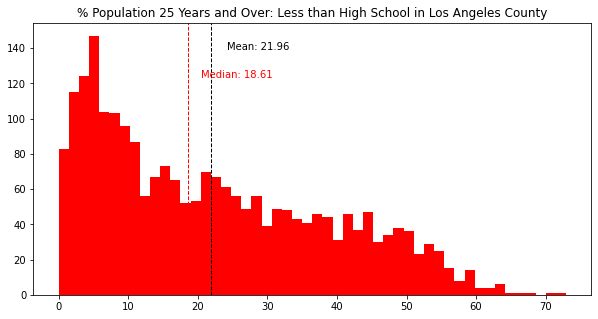

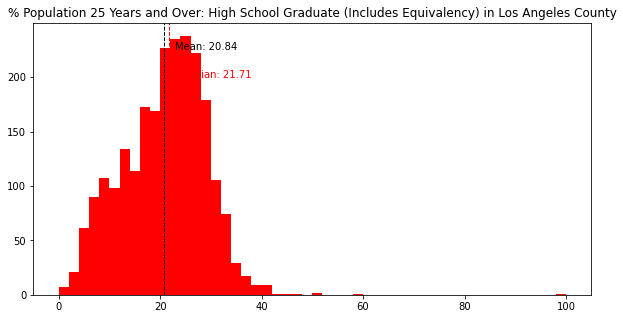

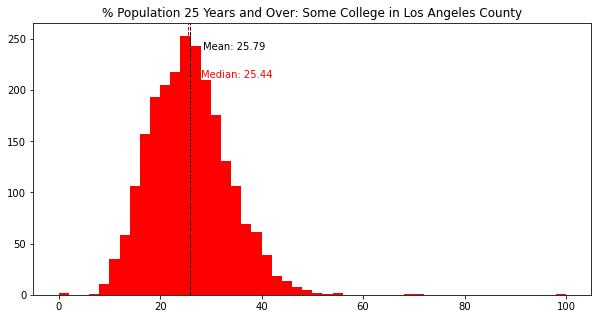

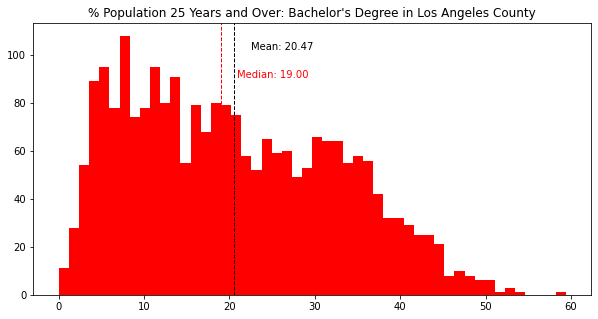

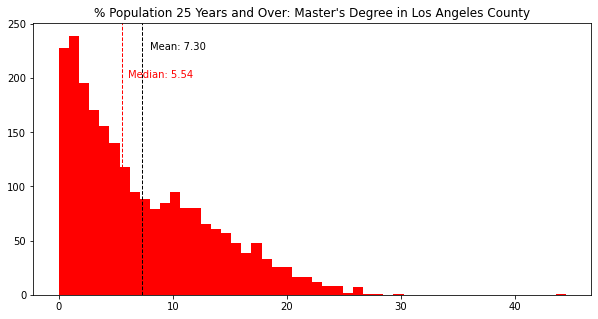

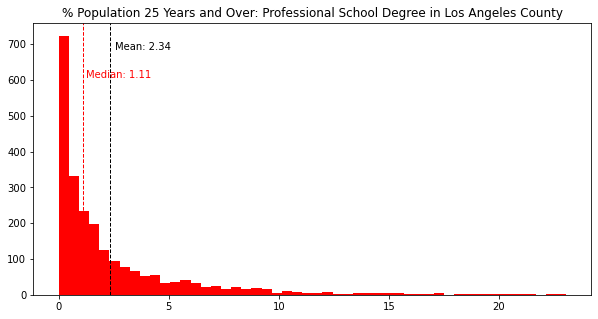

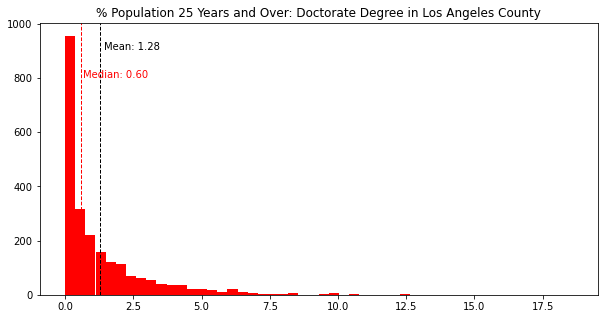

In [15]:
for indicator in indicators:
    get_histogram(column=indicator)

# Maps

## Create a single choropleth map with a variable of your choice 

- Make it big
- Zoom in (don't show Catalina Island)

In [16]:
def get_map(column='% Population 25 Years and Over: Doctorate Degree'):
    ax = gdf.plot(figsize=(10,10),
                  column=column,
                  legend=True,
                  vmin=0,
                  vmax=100,
                  cmap='hot')
    ax.set_ylim(33.6,34.9)
    ax.set_title(column, fontsize=14)
    ax.axis('off');

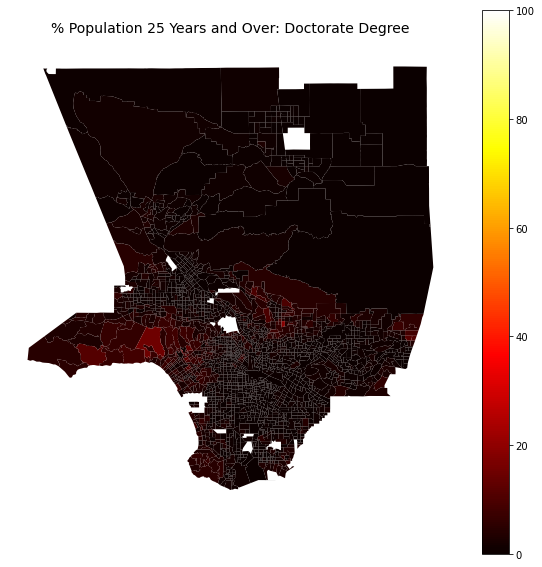

In [18]:
get_map()

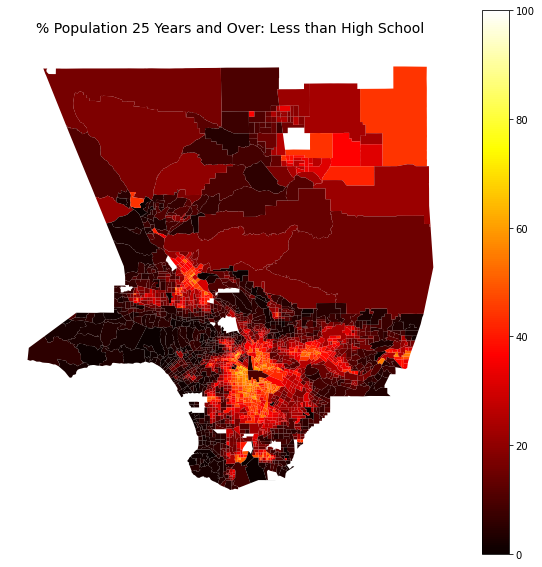

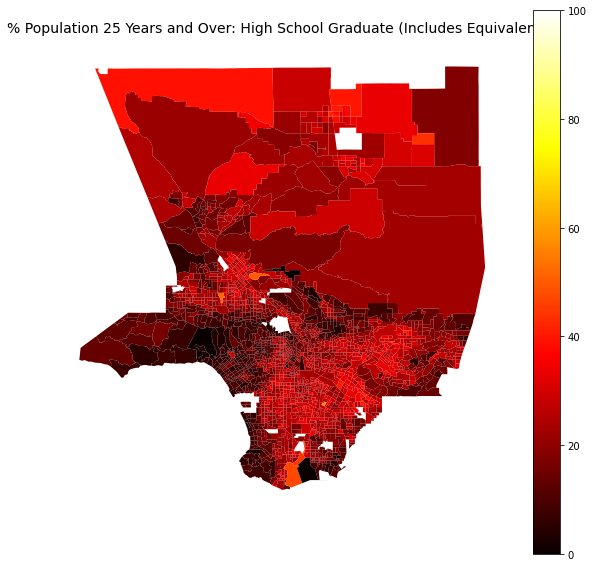

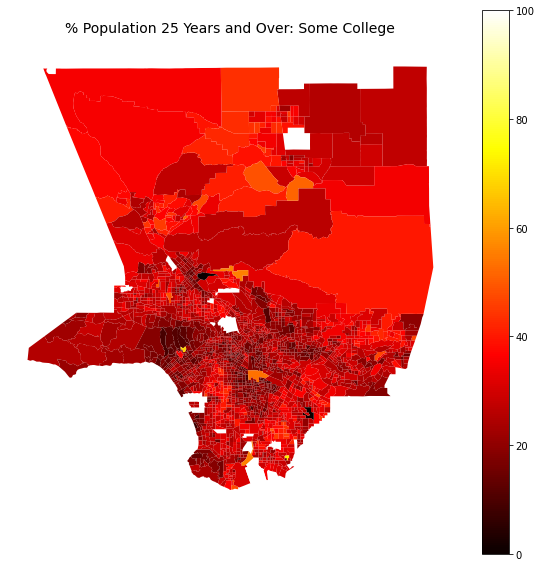

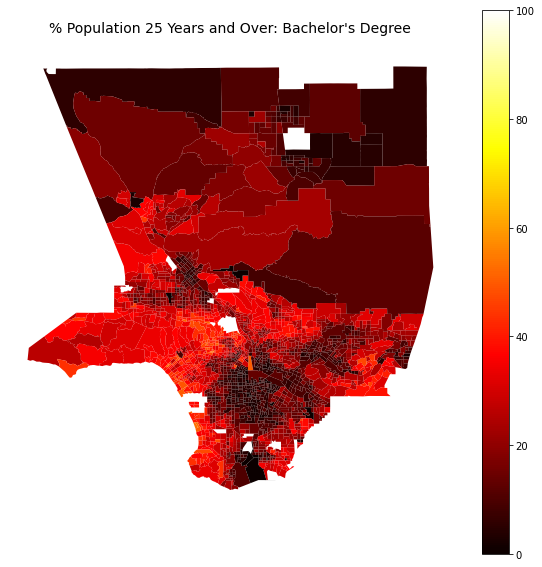

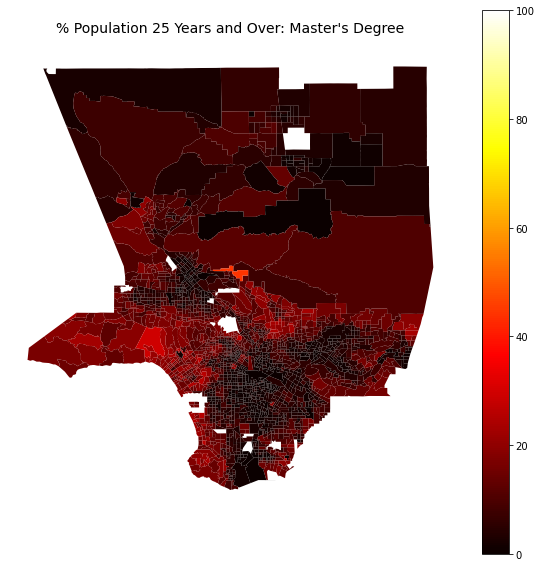

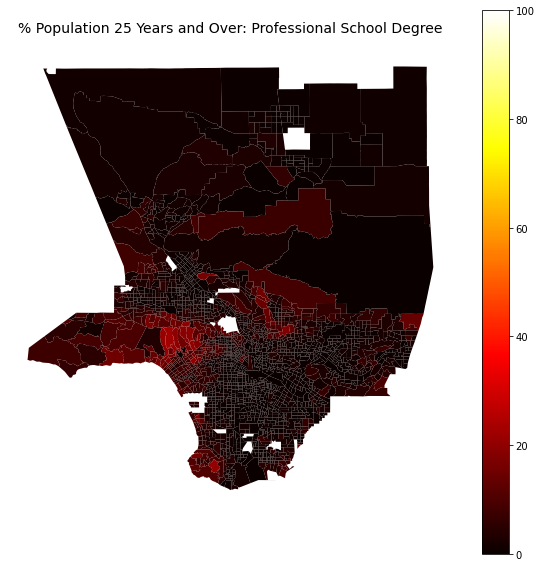

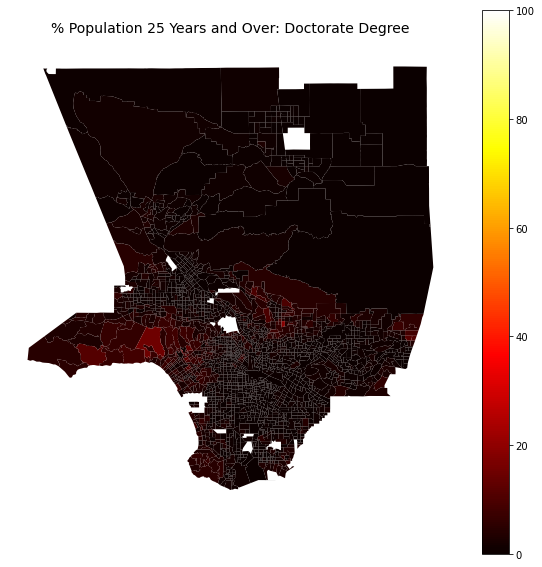

In [17]:
for indicator in indicators:
    get_map(indicator)

## Create a side-by-side map

- Zoom in (sorry Catalina)
- Make the breakdowns the same between both maps

Example arguments to make custom breakdowns
```python
gdf.plot(ax=ax[0],
         column='% Total Population: White Alone',
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )
```

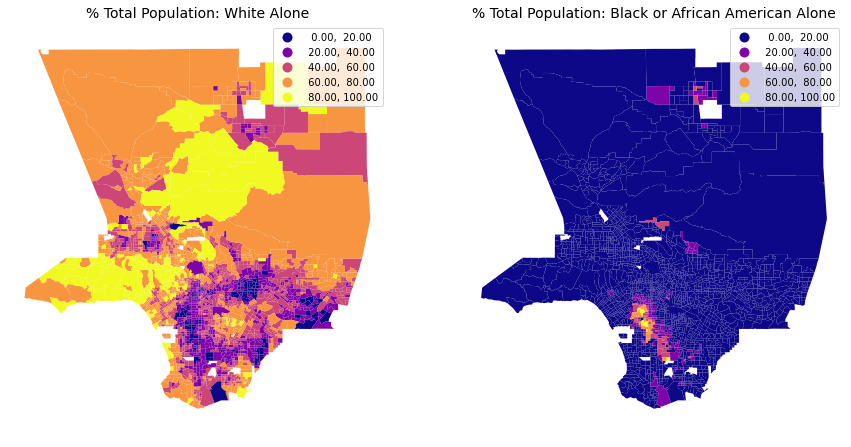

In [19]:
column1 = '% Total Population: White Alone'
column2 = '% Total Population: Black or African American Alone'
fig,ax = plt.subplots(1,2,figsize=(15,8))

gdf.plot(ax=ax[0],
         column=column1,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='plasma'
        )

ax[0].set_ylim(33.6,34.9)
ax[0].set_title(column1, fontsize=14)
ax[0].axis('off');

gdf.plot(ax=ax[1],
         column=column2,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='plasma'
        )

ax[1].set_ylim(33.6,34.9)
ax[1].set_title(column2, fontsize=14)
ax[1].axis('off');



## Create a single map with two layers

- Make one variable the "base" choropleth map
- Overlay another variable, only showing the boundary outlines that match a particular query
- Make sure the map tells a story

Sample arguments to make your second overlay:

```python
    alpha=1,
    linewidth=1,
    hatch="////",
    facecolor="none", 
    color='red'
```

In [20]:
gdf['% Population 15 Years and Over: Divorced'].describe()

count    2327.000000
mean        8.222398
std         3.769982
min         0.000000
25%         5.920000
50%         7.770000
75%        10.080000
max       100.000000
Name: % Population 15 Years and Over: Divorced, dtype: float64

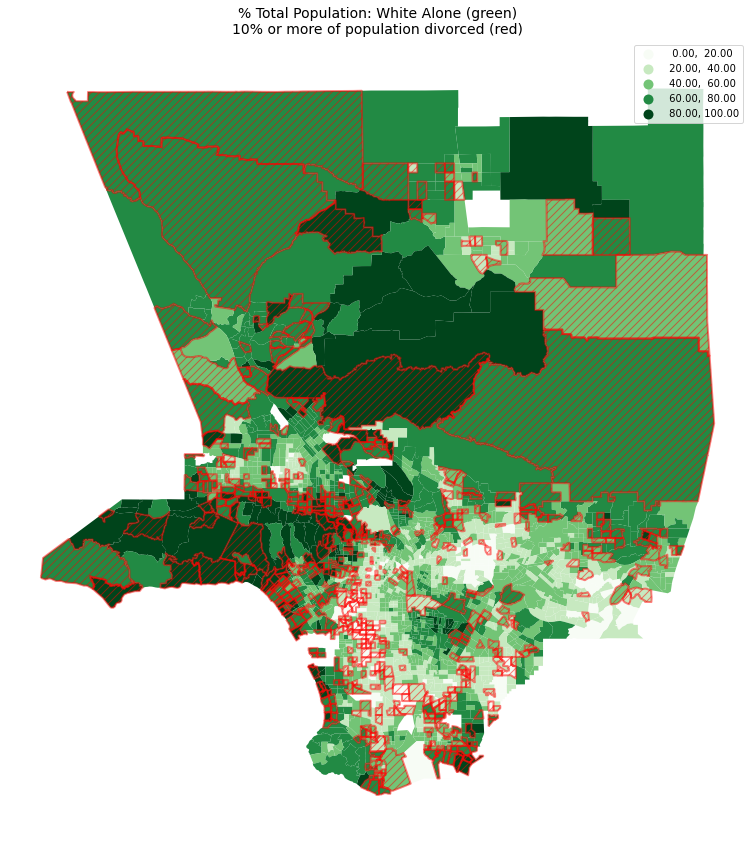

In [22]:
column1 = '% Total Population: White Alone'
column2 = '% Population 15 Years and Over: Divorced'
fig,ax = plt.subplots(figsize=(15,15))

gdf.plot(ax=ax,
         column=column1,
         legend=True,
         scheme='user_defined', 
         classification_kwds={'bins':[20,40,60,80,100]},
         cmap='Greens'
        )

gdf[gdf['% Population 15 Years and Over: Divorced'] >= 10].boundary.plot(ax=ax,
        alpha=0.5,
        linewidth=2,
        hatch="///",
        color='red'
        )

ax.set_ylim(33.6,34.9)
ax.set_title(column1 + ' (green)\n' + '10% or more of population divorced (red)', fontsize=14)
ax.axis('off');



## Part 2: Council District Maps

In [23]:
# Council Districts
gdf_cd = gpd.read_file('data/Council Districts.geojson')

## Do a spatial join to get the census tracts inside of CD1

In [24]:
gdf_cd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   dist_name  15 non-null     object  
 1   district   15 non-null     object  
 2   name       15 non-null     object  
 3   objectid   15 non-null     object  
 4   geometry   15 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 728.0+ bytes


In [25]:
gdf_cd

,dist_name,district,name,objectid,geometry
0,1 - Gilbert Cedillo,1,Gilbert Cedillo,1,"MULTIPOLYGON (((-118.26869 34.04671, -118.2688..."
1,2 - Paul Krekorian,2,Paul Krekorian,2,"MULTIPOLYGON (((-118.33732 34.22103, -118.3345..."
2,3 - Bob Blumenfield,3,Bob Blumenfield,3,"MULTIPOLYGON (((-118.54919 34.22053, -118.5491..."
3,4 - Nithya Raman,4,Nithya Raman,4,"MULTIPOLYGON (((-118.51860 34.20840, -118.5185..."
4,5 - Paul Koretz,5,Paul Koretz,5,"MULTIPOLYGON (((-118.39158 34.11243, -118.3923..."
5,6 - Nury Martinez,6,Nury Martinez,6,"MULTIPOLYGON (((-118.36533 34.22870, -118.3618..."
6,7 - Monica Rodriguez,7,Monica Rodriguez,7,"MULTIPOLYGON (((-118.33732 34.22103, -118.3395..."
7,8 - Marqueece Harris-Dawson,8,Marqueece Harris-Dawson,8,"MULTIPOLYGON (((-118.30027 34.03716, -118.2988..."
8,9 - Curren D. Price Jr.,9,Curren D. Price Jr.,9,"MULTIPOLYGON (((-118.23971 34.01480, -118.2397..."
9,10 - Office of District 10,10,Office of District 10,10,"MULTIPOLYGON (((-118.28789 34.06897, -118.2878..."


In [27]:
# function to create a council district map
def cd_map(district = '1', column = '% Total Population: Hispanic or Latino'):
    # this cd
    this_cd = gdf_cd[gdf_cd['district']==district]
    
    # spatial join to get tracts
    tracts = gpd.sjoin(gdf,this_cd)

    # plot it
    fig,ax = plt.subplots()

    # map
    tracts.plot(ax=ax,
                column=column, 
                vmin=0,
                vmax=100,
                legend=True)

    ax.axis('off')
    ax.set_title('Council District ' + district + '\n(' + column + ')', fontsize=14)

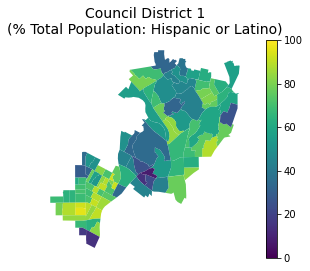

In [28]:
cd_map()

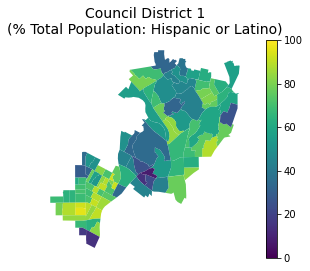

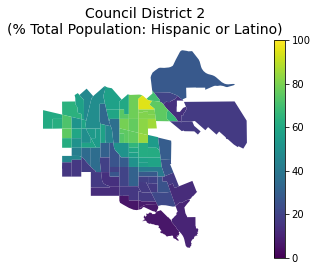

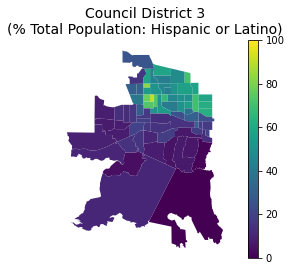

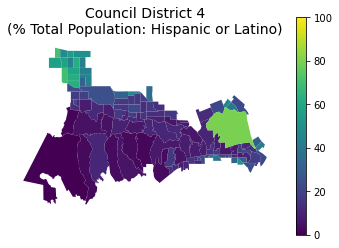

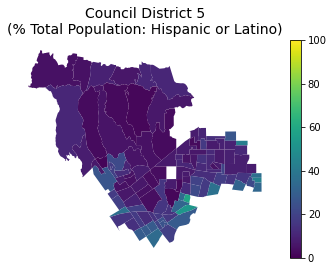

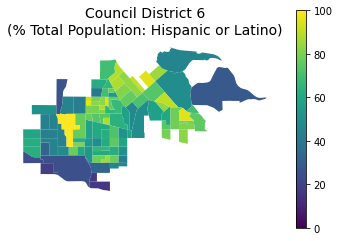

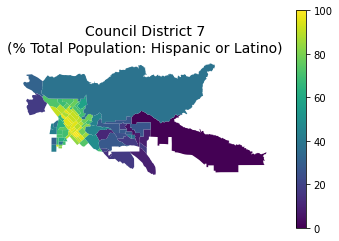

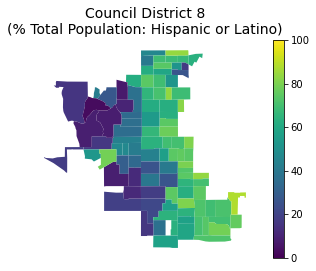

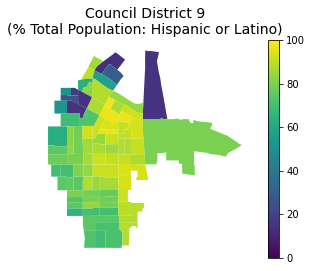

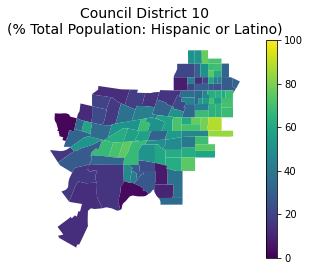

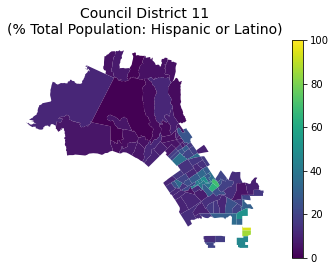

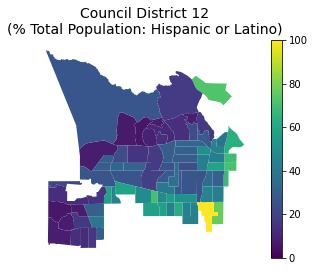

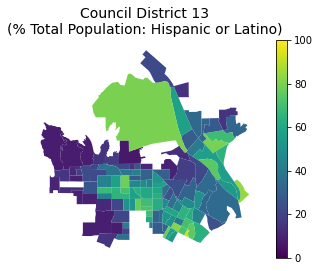

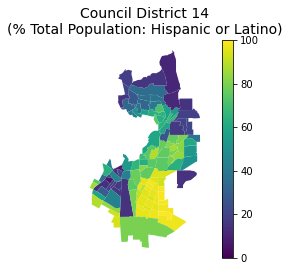

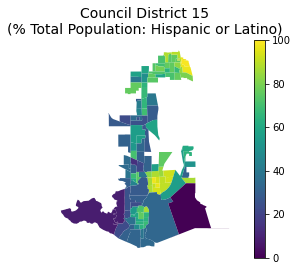

In [29]:
for index, row in gdf_cd.iterrows():
    cd_map(district = row['district'])

In [ ]:
list(gdf)

In [30]:
indicators = [ '% Total Population: Not Hispanic or Latino',
 '% Total Population: Not Hispanic or Latino: White Alone',
 '% Total Population: Not Hispanic or Latino: Black or African American Alone',
 '% Total Population: Not Hispanic or Latino: American Indian and Alaska Native Alone',
 '% Total Population: Not Hispanic or Latino: Asian Alone',
 '% Total Population: Not Hispanic or Latino: Native Hawaiian and Other Pacific Islander Alone',
 '% Total Population: Not Hispanic or Latino: Some Other Race Alone',
 '% Total Population: Not Hispanic or Latino: Two or More Races',
 '% Total Population: Hispanic or Latino']

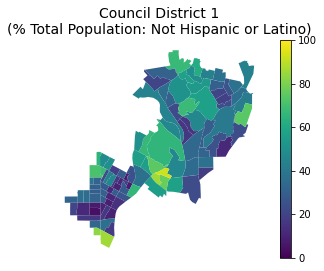

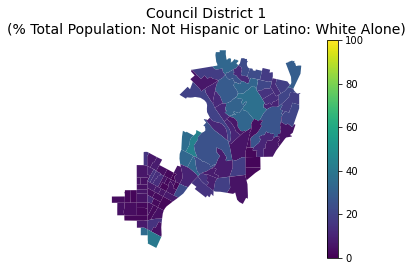

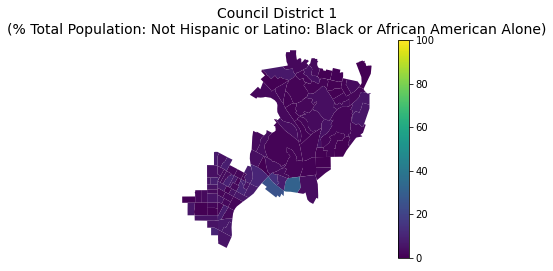

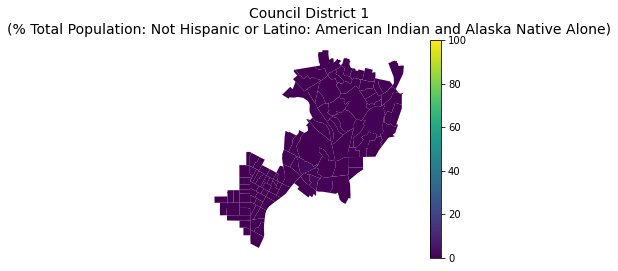

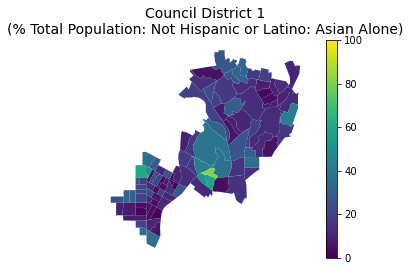

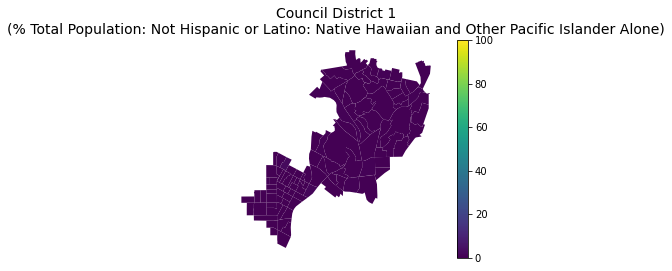

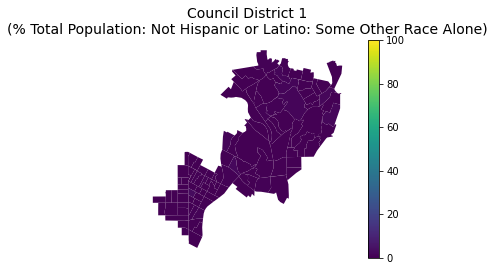

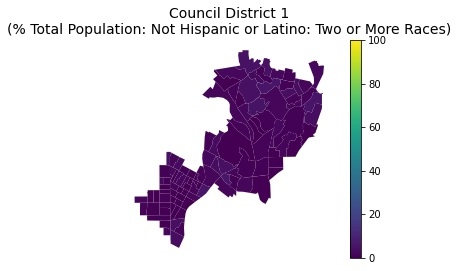

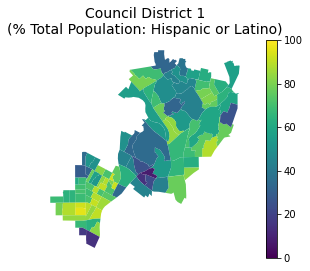

In [31]:
for indicator in indicators:
    cd_map(district='1',column=indicator)